In [74]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data
num_points = 50
hours_studied = np.random.uniform(1, 10, num_points)  # Average hours studied (1 to 10)
marks_obtained = np.random.randint(0, 101, num_points)  # Marks obtained (0 to 100)

# Create DataFrame
data = pd.DataFrame({
    'Hours_Studied': hours_studied,
    'Marks_Obtained': marks_obtained
})

# Display the first 10 rows of the dataset
data.head()

,Hours_Studied,Marks_Obtained
0,4.370861,62
1,9.556429,17
2,7.587945,89
3,6.387926,43
4,2.404168,33


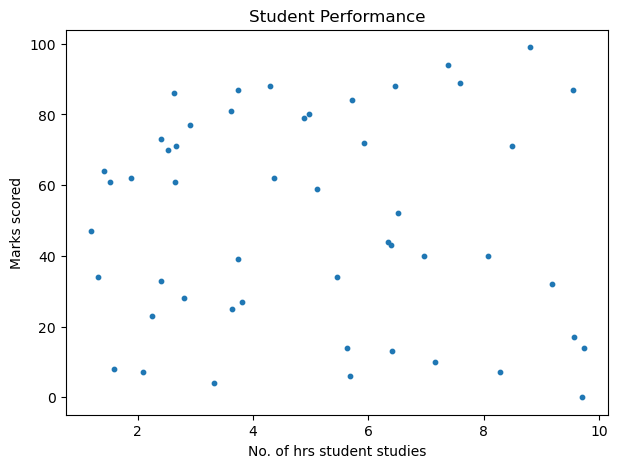

In [5]:
plt.figure(figsize=(7,5))
plt.scatter(hours_studied,marks_obtained,s=10)
plt.xlabel('No. of hrs student studies')
plt.ylabel('Marks scored')
plt.title('Student Performance')
plt.show()

In [6]:
scaler=StandardScaler()
features=scaler.fit_transform(data)

#convert to panda dataframe
scaled_data=pd.DataFrame(features,columns=data.columns)

scaled_data.head()

,Hours_Studied,Marks_Obtained
0,-0.249611,0.418550
1,1.765126,-1.115223
2,1.000316,1.338813
3,0.534075,-0.229043
4,-1.013726,-0.569882


In [7]:
X=scaled_data.values

In [26]:
def index_closest_centroid(X,centroids):
    """
    Takes X data points and centroids:
        For each data points X_i, find the closest centroid from all.
            return index of corresponding centroid for each X_i
    """
    
    #number of centroids 
    K=centroids.shape[0]

    # [0,0,..0]
    idx = np.zeros(X.shape[0], dtype=int)
    norm=np.zeros(K)

    for i,x in enumerate(X):
        for j in range(K):
            norm[j]=np.dot((x-centroids[j]),(x-centroids[j]))
        idx[i]=np.argmin(norm)

    return idx
    

In [43]:
np.random.seed(41)
random_indices = np.random.choice(X.shape[0], size=4, replace=False)
initial_centroids = X[random_indices]

idx = index_closest_centroid(X, initial_centroids)

# Print closest centroids for the first three elements
print(" elements in idx are:", idx)

 elements in idx are: [1 2 2 1 0 0 0 2 1 2 0 2 2 0 3 0 0 1 1 3 1 0 0 1 1 1 0 1 1 0 2 0 0 2 1 1 3
 0 1 1 0 1 0 2 0 1 0 0 1 0]


 Now
 
 -For each cluster, each centroid is updated to new position which is mean of data points in that cluster.

In [56]:
def compute_centroid_mean(X,idx,K):
    """
    Computes new centroids for each cluster.

    Initialize 
    centriods=[(0,0,... diminish of each data point...,0)
                0,0,...
                .
                .
                Number of clusters
                .
                .
                0,0,..,0,0]

    """
    m,n=X.shape
    centroids = np.zeros((K, n))
    
    for k in range(K):
        k_cluster=[]
        for i in range(idx.shape[0]):
            if idx[i]==k:
                k_cluster.append(X[i])
        centroids[k]=np.mean(k_cluster,axis=0)

    return centroids   
                
    

In [80]:
K = 4
centroids = compute_centroid_mean(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[-0.95398858 -0.84255243]
 [ 0.9279367  -0.86300273]
 [ 0.96125292  1.21951965]
 [-0.69469997  0.77856002]]


In [60]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = index_closest_centroid(X, centroids)

        """
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
         """
        
        # Given the memberships, compute new centroids
        centroids = compute_centroid_mean(X, idx, K)
    plt.show() 
    return centroids, idx

In [69]:
# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)
print(centroids)
print(idx)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

[[-0.95398858 -0.84255243]
 [ 0.9279367  -0.86300273]
 [ 0.96125292  1.21951965]
 [-0.69469997  0.77856002]]
[3 1 2 1 0 3 3 2 1 2 0 1 2 3 3 3 0 2 3 3 1 0 0 3 3 1 0 1 1 3 2 3 0 2 1 1 3
 3 1 3 0 1 0 1 0 1 0 1 2 3]


In [70]:
original_centers = scaler.inverse_transform(centroids)

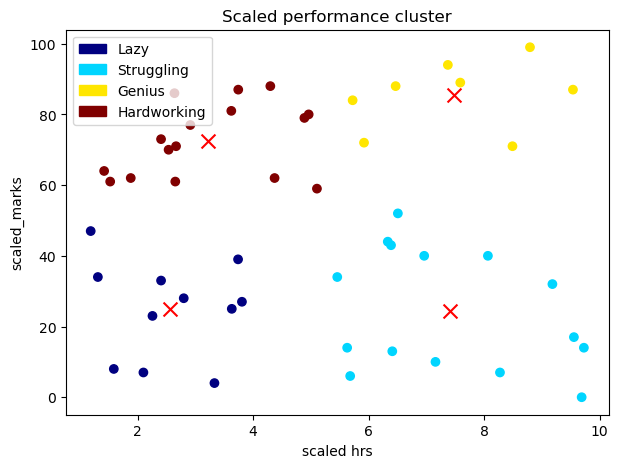

In [79]:
plt.figure(figsize=(7, 5))
scatter = plt.scatter(data.values[:, 0], data.values[:, 1], c=idx, cmap='jet')
plt.scatter(original_centers[:, 0], original_centers[:, 1], c='red', marker='x', s=100)



# Creating custom legend with matching colors
cluster_label = ['Lazy', 'Struggling', 'Genius', 'Hardworking']
unique_labels = sorted(set(idx))
patches = [mpatches.Patch(color=scatter.cmap(scatter.norm(i)), label=cluster_label[i]) 
           for i in unique_labels]
plt.legend(handles=patches)

plt.xlabel('scaled hrs')
plt.ylabel('scaled_marks')
plt.title('Scaled performance cluster')
plt.show()
